## Assignment : To perform introductory basic data analysis EDA( with help of plotting techniques and staststical tools) 


In [1]:
#objective 1:load supporting python libraries to accomplish the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# to load dataset.
canc_patnt = pd.read_csv('D://Users//jalesh//Downloads/haberman.csv',header=None,names=['age_when_operated', 'year_of_operation', 'Aux_lymph_nodes', 'survival_stat'])
canc_patnt.tail(10)

#Observation:

#Assumption 1. class label 'survival_stat' has two categories 1 & 2 ,therefore,
# 1 would be: patients who could survive more(>5 years) &,
# 2 would be: patiens who couldnt survive more(<5 years)

#Assumption 2: feature 'year_of_operation' would be considered as operation was carried out in 20th century(1900-)

,age_when_operated,year_of_operation,Aux_lymph_nodes,survival_stat
296,72,67,3,1
297,73,62,0,1
298,73,68,0,1
299,74,65,3,2
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [3]:
# to check no of datapoints,features & consice summary of canc_patnt dataset.
canc_patnt.shape
canc_patnt.columns
canc_patnt.describe()

#Observation:
#1.average age of pateients are ~52.4
#2.high deviation(scatterness) is seen in age_when_operted feature ~ 10.8
#3.Aux_lymph_nodes feature is spreaded more around its mean  ~ 7.18


,age_when_operated,year_of_operation,Aux_lymph_nodes,survival_stat
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
canc_patnt['survival_stat'].value_counts()

#Observation:
#1.class label is imbalaced as it has hetregenous count of 1(who survived more) & 2(who couldnt survive more)
#2.81 patients operated upon and who couldnt survived more(2)
#3.225 people were operated upon and could survive more.(1)
#4.306 people were operated upon in totality.

1    225
2     81
Name: survival_stat, dtype: int64

## Objective: to calculate various statistical operation on given dataset:


In [5]:
canc_patnt['age_when_operated'].mean()

52.45751633986928

In [137]:
canc_patnt['age_when_operated'].std()

10.80345234930328

In [138]:
canc_patnt['Aux_lymph_nodes'].mean()

4.026143790849673

In [139]:
canc_patnt['Aux_lymph_nodes'].std()

7.189653506248565

In [141]:
canc_patnt['year_of_operation'].value_counts()

#Observation: 1958 was the year when maximum no of cancer petients were operatoed upon.and 1969 was the year operation was minimum.

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year_of_operation, dtype: int64

In [7]:
canc_patnt.groupby('survival_stat').max()
#max age of patients who survived and couldnt survive more after battling cancer

,age_when_operated,year_of_operation,Aux_lymph_nodes
survival_stat,,,
1,77,69,46
2,83,69,52


In [140]:
canc_patnt.groupby('survival_stat').min()

,age_when_operated,year_of_operation,Aux_lymph_nodes
survival_stat,,,
1,30,58,0
2,34,58,0


In [143]:
canc_patnt.groupby('survival_stat').count()
#observation:
#1. the average person's age in who survived more and less list are ~52 and ~53 respectively.
#2. the avgerage person's age in who survived more had lower no of Aux_lymph_nodes.

,age_when_operated,year_of_operation,Aux_lymph_nodes
survival_stat,,,
1,225,225,225
2,81,81,81


In [136]:
canc_patnt.head()

,age_when_operated,year_of_operation,Aux_lymph_nodes,survival_stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## plots

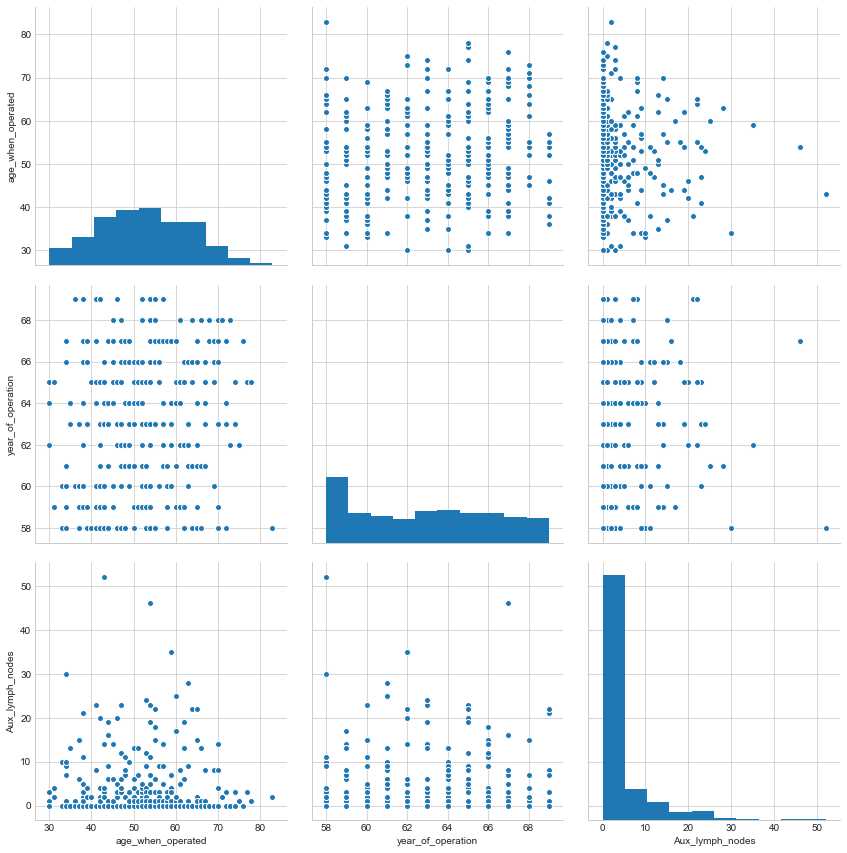

In [4]:
sns.set_style('whitegrid')
sns.pairplot(canc_patnt.iloc[:,[0,1,2]], size=4)
#observation:
#1.no cconcrete assumption or conclusion can be made after seeing the pairplot between features

In [46]:
sum(canc_patnt[(canc_patnt['Aux_lymph_nodes'] < 5) & (canc_patnt['survival_stat'] == 1)]['survival_stat'])

#observation:
#1.patients having aux_lymph_nodes ~ <10 lived more after having operated.

188

In [104]:
print('the quantile is : {}'.format(np.percentile(canc_patnt['Aux_lymph_nodes'], np.arange(0,100,25))))

the quantile is : [ 0.  0.  1.  4.]


In [144]:
canc_patnt.corr()

,age_when_operated,year_of_operation,Aux_lymph_nodes,survival_stat
age_when_operated,1.000000,0.089529,-0.063176,0.067950
year_of_operation,0.089529,1.000000,-0.003764,-0.004768
Aux_lymph_nodes,-0.063176,-0.003764,1.000000,0.286768
survival_stat,0.067950,-0.004768,0.286768,1.000000


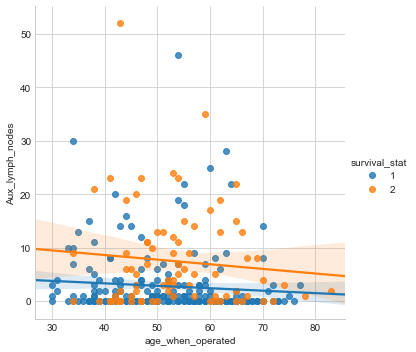

In [6]:
sns.lmplot(x='age_when_operated', y='Aux_lymph_nodes', data=canc_patnt, hue='survival_stat')

#observation:
#1.couldnt conclude after having seen linear module plot.


In [28]:
#1D scatter plot:
canc_patnt.columns

Index(['age_when_operated', 'year_of_operation', 'Aux_lymph_nodes',
       'survival_stat'],
      dtype='object')

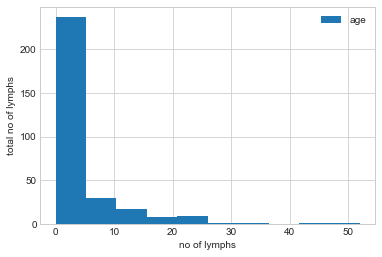

In [12]:
plt.hist(x='Aux_lymph_nodes', data=canc_patnt, label='age')
plt.xlabel('no of lymphs')
plt.ylabel('total no of lymphs')
plt.legend()

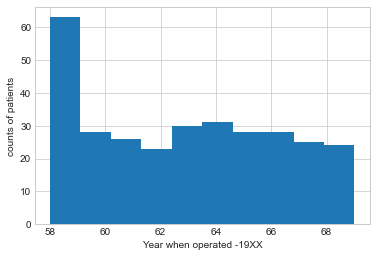

In [11]:
plt.hist(x='year_of_operation', data=canc_patnt)
plt.xlabel('Year when operated -19XX')
plt.ylabel('counts of patients')

In [38]:
canc_patnt[canc_patnt['year_of_operation'] == canc_patnt['age_when_operated']]['age_when_operated'].value_counts()

63    2
58    2
62    1
68    1
Name: age_when_operated, dtype: int64

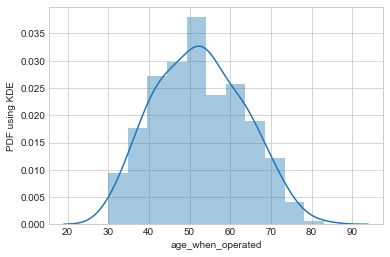

In [9]:
sns.distplot(canc_patnt['age_when_operated'])
plt.ylabel('PDF using KDE')

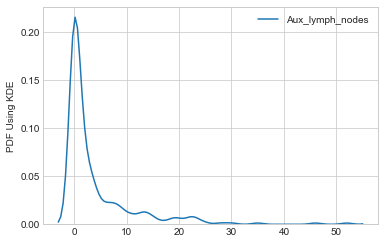

In [10]:
sns.kdeplot(canc_patnt['Aux_lymph_nodes'])
plt.ylabel('PDF Using KDE')

E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


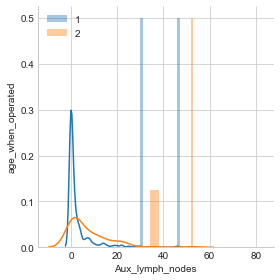

In [48]:
sns.set_style("whitegrid")
g = sns.FacetGrid(canc_patnt, hue="survival_stat", size=4) 
g.map(sns.distplot, 'Aux_lymph_nodes', 'age_when_operated')
plt.legend()
#observation:patents couldnt suvive more had more wider of spread of lymphs as compaped to the the patient lived longer


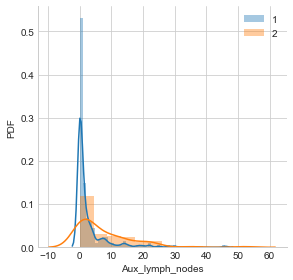

In [7]:
sns.set_style("whitegrid")
g = sns.FacetGrid(canc_patnt, hue="survival_stat", size=4) 
g.map(sns.distplot, 'Aux_lymph_nodes')
plt.ylabel('PDF')
plt.legend()

#observation: comparing three univarete distribution plots , graphs Aux_lymph_nodes is somewhat better than those 2.

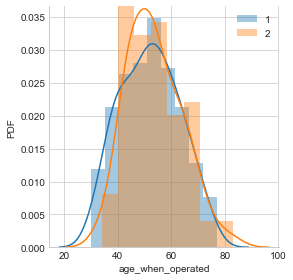

In [8]:
sns.set_style("whitegrid")
g = sns.FacetGrid(canc_patnt, hue="survival_stat", size=4) 
g.map(sns.distplot, 'age_when_operated')
plt.ylabel('PDF')
plt.legend()

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


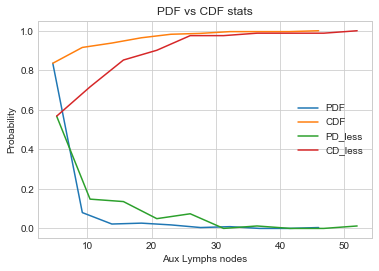

In [15]:
fig = plt.Figure(figsize=(10,10), dpi=400)

survived_more = canc_patnt[canc_patnt['survival_stat'] == 1]
survived_less = canc_patnt[canc_patnt['survival_stat'] == 2]

counts, bin_edges = np.histogram(survived_more['Aux_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)


plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
#plt.legend([])
plt.title('PDF vs CDF stats')
plt.xlabel('Aux Lymphs nodes')



counts, bin_edges = np.histogram(survived_less['Aux_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)


plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF vs CDF stats')
plt.xlabel('Aux Lymphs nodes')
plt.ylabel('Probability')
plt.legend(['PDF', 'CDF','PD_less', 'CD_less'])


In [83]:
cdf

array([ 0.83555556,  0.91555556,  0.93777778,  0.96444444,  0.98222222,
        0.98666667,  0.99555556,  0.99555556,  0.99555556,  1.        ])

In [84]:
pdf

array([ 0.83555556,  0.08      ,  0.02222222,  0.02666667,  0.01777778,
        0.00444444,  0.00888889,  0.        ,  0.        ,  0.00444444])

In [89]:
k = np.array()
for i in cdf:
    k =  k + np.array([i + 1])
print(k)

[ 2.]


In [76]:
survived_less.head()

,age_when_operated,year_of_operation,Aux_lymph_nodes,survival_stat
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


In [77]:
survived_more.head()

,age_when_operated,year_of_operation,Aux_lymph_nodes,survival_stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


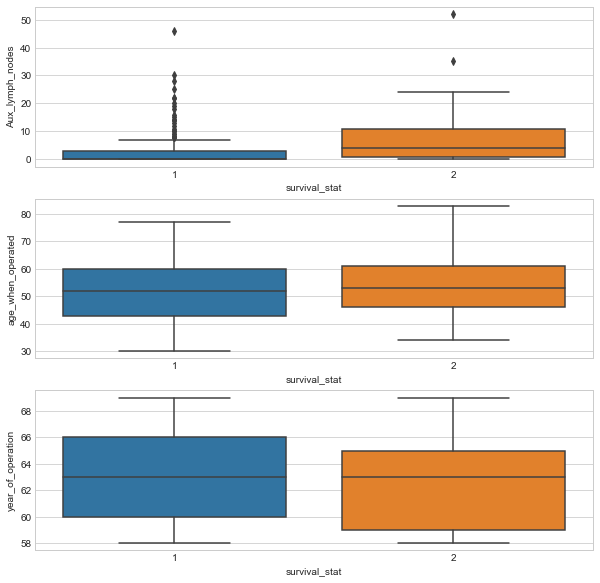

In [125]:
#boxplot to get the value of 25/50 75 percentile value
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.boxplot(x='survival_stat', y='Aux_lymph_nodes', data=canc_patnt)

plt.subplot(3,1,2)
sns.boxplot(x='survival_stat', y='age_when_operated', data=canc_patnt)

plt.subplot(3,1,3)
sns.boxplot(x='survival_stat', y='year_of_operation', data=canc_patnt)

#observation:
#1. min and 25% quantile have same value
#2. all the patients had 0 Aux_lymph_nodes survived more(1)
#3. those who were operated before 1960 , couldnt live more. 


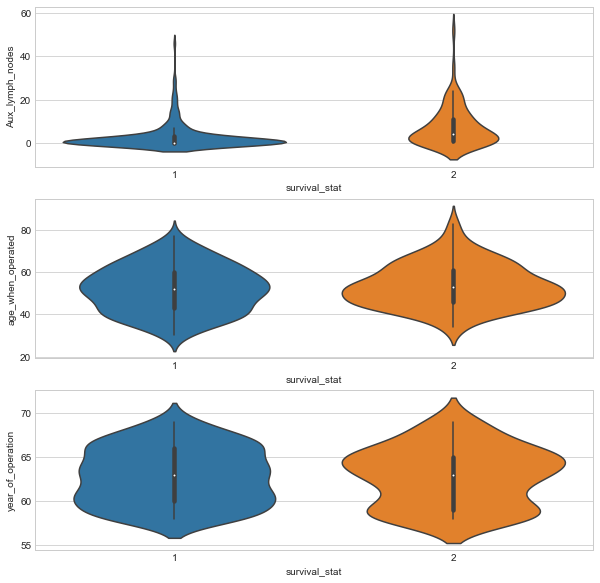

In [128]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.violinplot(x='survival_stat', y='Aux_lymph_nodes', data=canc_patnt)

plt.subplot(3,1,2)
sns.violinplot(x='survival_stat', y='age_when_operated', data=canc_patnt)

plt.subplot(3,1,3)
sns.violinplot(x='survival_stat', y='year_of_operation', data=canc_patnt)



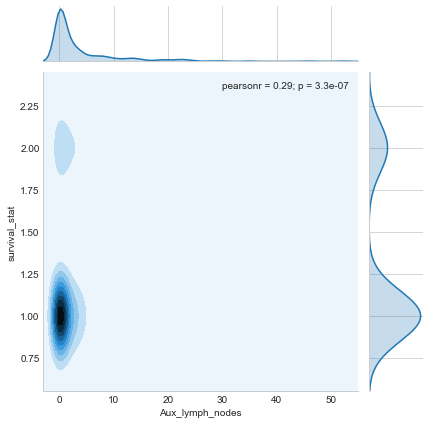

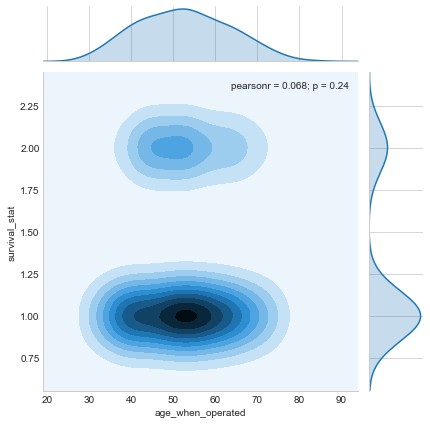

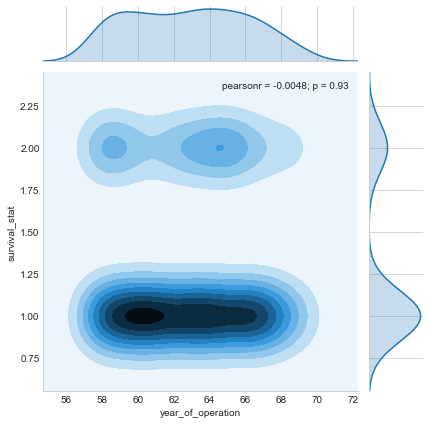

In [134]:
fig = plt.Figure(figsize=(4,10), dpi=200)

sns.jointplot(y='survival_stat', x='Aux_lymph_nodes', data=canc_patnt, kind='kde')
sns.jointplot(y='survival_stat', x='age_when_operated', data=canc_patnt, kind='kde')
sns.jointplot(y='survival_stat', x='year_of_operation', data=canc_patnt, kind='kde')

#observation:

## Conclusion :
** 1. average age of pateients are ~52.4**
** 2. class label is imbalaced as it has hetregenous count of 1(who survived more) & 2(who couldnt survive more)**
** 3. 81 patients operated upon and who couldnt survived more(2)**
** 4. 225 people were operated upon and could survive more.(1)**
** 5. 306 people were operated upon in totality.**
** 6. 1958 was the year when maximum no of cancer petients were operatoed upon.and 1969 was the year operation was minimum.max age of patients who survived and couldnt survive after battling cancer.**
** 7. average person's age in who survived more and less list are ~52 and ~53 respectively.**
** 8. the avgerage person's age in who survived more had lower no of Aux_lymph_nodes ~ lt 10**
** 9. those who were operated before 1960 , couldnt live more**
** 10. patients had 0 Aux_lymph_nodes survived more(1)**

        